# Problème raide (stiff)

In [4]:
using DifferentialEquations
using Plots
using ODEInterfaceDiffEq              # pour accéder à radau5
pyplot()
gr()
gr(dpi=300,size=(600,400),thickness_scaling=1)

Plots.GRBackend()


## Exemple curtiss et Hirschfelder
Cet exemple provient du tome 2 du livre d'Hairer, page 2. Le problème de Cauchy est
$$(IVP)_2\left\{\begin{array}{l}
\dot{y}(t)=-50(y(t)-\cos(t))\\
y(0)=0
\end{array}\right.
$$
avec $[t_0\;\; t_f]=[0\;\; 1.5]$.

On demande de résoudre numériquement ce problème avec les algorithmes : 
- d'Euler explicite, alg = Euler(), et avec un pas de 1.974/50 et un pas de 1.875/50 (option dt). On prendra aussi comme option dense = false afin de n'avoir que les points aux instant $t_i$.
- d'Euler implicite, algo = ImplicitEuler(), avec un pas de 0.5. On prendra aussi comme options dense = false et adaptive = false afin de n'avoir que les points aux instant $t_i$.



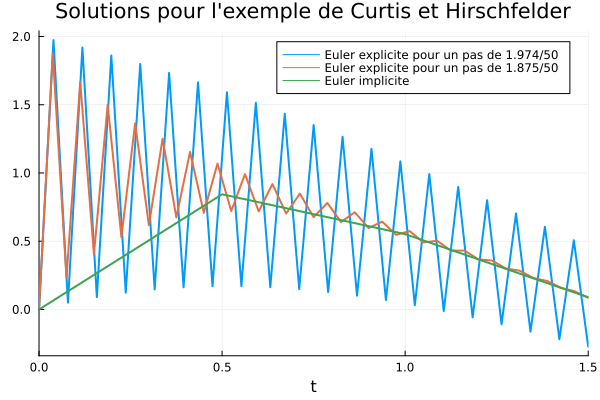

In [12]:
function curtiss(x,p,t)
# deuxieme membre de l'equation differentiel de l'equation de Curtiss et Hirschfelder
# ref: Hairer page 2 tome 2
# Input
# x : state
#     real(2)
# p : parameter vector
# t : time
#     real
# Output
# xpoint : vector of velocity
#          same as x
    xpoint    = similar(x)
    xpoint[1]    = -50*(x[1]-cos(t))
    return xpoint
end

x0 = [0.0];
t0 = 0.0;
tf = 1.5;
p = [1.0]
tspan = (t0,tf)
prob = ODEProblem(curtiss,x0,tspan,p)
sol_explicit1 = solve(prob, Euler(), dt = 1.974/50, dense = false)
sol_explicit2 = solve(prob, Euler(), dt = 1.875/50, dense = false)
sol_implicit = solve(prob, ImplicitEuler(), dt = 0.5, dense = false, adaptive = false)
plot(sol_explicit1, title = "Solutions pour l'exemple de Curtis et Hirschfelder", label = "Euler explicite pour un pas de 1.974/50", lw =2)
plot!(sol_explicit2, label = "Euler explicite pour un pas de 1.875/50", lw = 2)
plot!(sol_implicit, label = "Euler implicite", lw =2)

### Exemple de Roberston
On considère la réaction chimique 
$$\begin{array}{cccl}
A & \stackrel{0.04}{\longrightarrow} & B & \textrm{(lente)},\\
B+B & \stackrel{3.10^7}{\longrightarrow} & C+B & \textrm{(très rapide)},\\
B+C & \stackrel{10^4}{\longrightarrow} & A+C & \textrm{(rapide)}.\\
\end{array}
$$
Le système différentiel associé à cette réaction chimique est donnée par
$$(IVP)\left\{\begin{array}{lrr}
\dot{x}_1(t)= &-0.04x_1(t)+10^4x_2(t)x_3(t) &\\
\dot{x}_2(t)= & 0.04x_1(t)-10^4x_2(t)x_3(t) &-3.10^7x_2^2(t)\\
\dot{x}_3(t)= &                             & 3.10^7x_2^2(t)\\
x_1(0)=1,
x_2(0)=0,
x_3(0)=0.
\end{array}\right.
$$
avec $[t_0\;\; t_f]=[0\;\; 0.3]$.

On demande de résoudre numériquement ce problème avec les algorithmes : 
- algo = DP5() (Dormand-Prince's 5/4 Runge-Kutta method, algorithme utilisé dans ode45 de matlab et dopri5 du Professeur Hairer) et les options reltol = 1e-2, abstol = 1.e-6, dense = false
- algo = DP5() (Dormand-Prince's 5/4 Runge-Kutta method, algorithme utilisé dans ode45 de matlab et dopri5 du Professeur Hairer) et les options reltol = 1e-3, abstol = 1.e-6, dense = false, dense = false
- algo = radau5() : pragramme Radau5 du Professeur Hairer pour les problème raides.

Et d'afficher sur le même graphique la deuxième composante




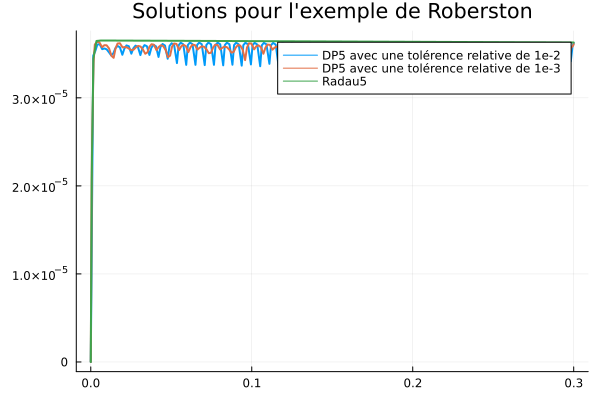

In [20]:
function chimie(x,p,t)
# deuxieme membre de l'equation differentiel de l'equation de Robertson (1966)
# ref: Hairer page 3 tome 2
# Input
# x : state
#     real(2)
# p : parameter vector
# t : time
#     real
# Output
# xpoint : vector of velocity
#          same as x
    xpoint    = similar(x)
    xpoint[1] = -0.04*x[1] +10^4 *x[2]*x[3]
    xpoint[2] = 0.04*x[1] -10^4 *x[2]*x[3] -3*10^7 *x[2]*x[2]
    xpoint[3] = 3.10^7 *x[2]*x[2]
    
    return xpoint
end

x0 = [1., 0., 0.];
t0 = 0.;
tf = 0.3;
p = []
tspan = (t0,tf)
xpoint = similar(x0)
prob = ODEProblem(chimie,x0,tspan,p)
sol_DP5_2 = solve(prob, DP5(), reltol = 1e-2, abstol = 1e-6, dense = false)
sol_DP5_3 = solve(prob, DP5(), reltol = 1e-3, abstol = 1e-6, dense = false)
sol_radau5 = solve(prob, radau5())
plot(sol_DP5_2.t, sol_DP5_2[2,:], title = "Solutions pour l'exemple de Roberston", label = "DP5 avec une tolérence relative de 1e-2", lw =2)
plot!(sol_DP5_3.t, sol_DP5_3[2,:], label = "DP5 avec une tolérence relative de 1e-3", lw =2)
plot!(sol_radau5.t, sol_radau5[2,:], label = "Radau5", lw =2)

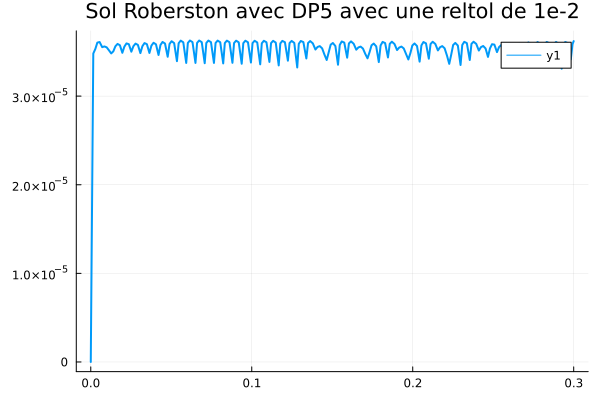

In [21]:
plot(sol_DP5_2.t, sol_DP5_2[2,:], title = "Sol Roberston avec DP5 avec une reltol de 1e-2", lw =2)

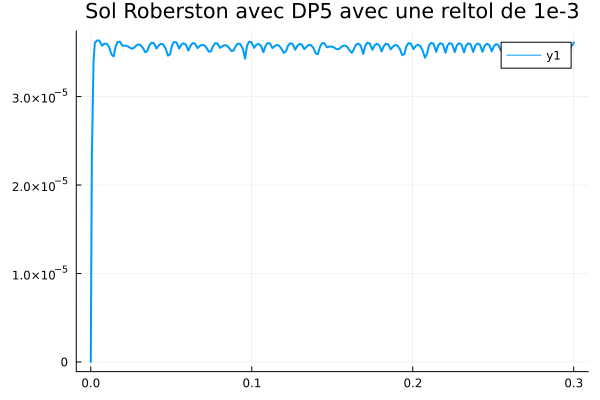

In [22]:
plot(sol_DP5_3.t, sol_DP5_3[2,:], title = "Sol Roberston avec DP5 avec une reltol de 1e-3", lw =2)

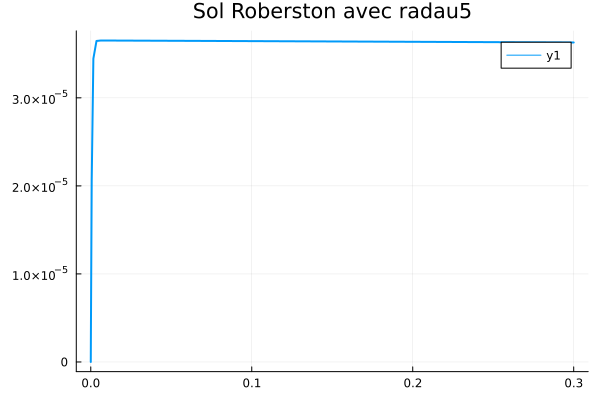

In [23]:
plot(sol_radau5.t, sol_radau5[2,:], title = "Sol Roberston avec radau5", lw =2)